In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import copy
import math


In [2]:
df = pd.read_csv('USA_Housing.csv')
print(df.columns)

X, Y = df.loc[ :, ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms', 'Area Population']], df.loc[:, 'Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [3]:
def predict(x, w, b):
    p = np.dot(w,x) + b
    return p

In [4]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [5]:
def compute_gradient(X, y, w, b): 

    m,n = X.shape         
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):     

        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [6]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [7]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0

print((w_init, b_init))

iterations = 3000
alpha = 0.001

w_final, b_final, J_hist = gradient_descent(X_train, Y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

(array([0., 0., 0., 0., 0.]), 0.0)
Iteration    0: Cost 823022397499.34   
Iteration  300: Cost 453601807858.39   
Iteration  600: Cost 251175624494.34   
Iteration  900: Cost 140181434373.59   
Iteration 1200: Cost 79285813246.54   
Iteration 1500: Cost 45857984399.44   
Iteration 1800: Cost 27498134863.08   
Iteration 2100: Cost 17408158716.04   
Iteration 2400: Cost 11859185044.09   
Iteration 2700: Cost 8804958255.19   


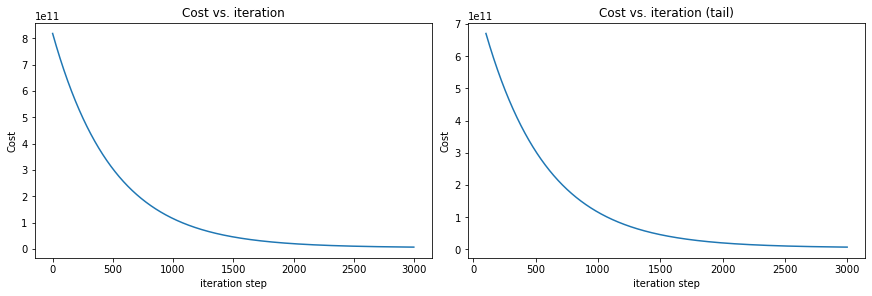

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost');
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step');
ax2.set_xlabel('iteration step')
plt.show()

In [136]:
Y_predicted = []
for i in range(X_test.shape[0]):
    Y_predicted.append(predict(X_test[i], w_final, b_final))


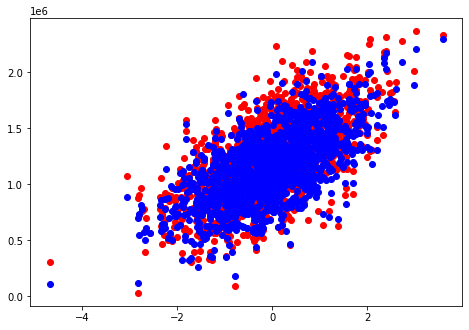

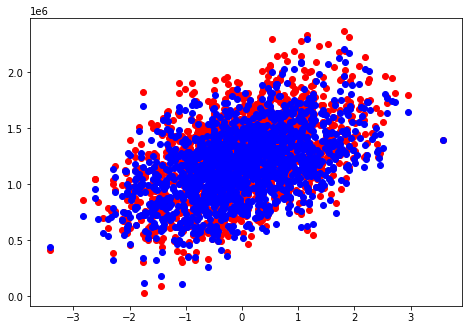

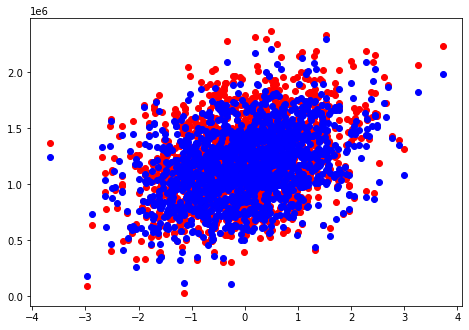

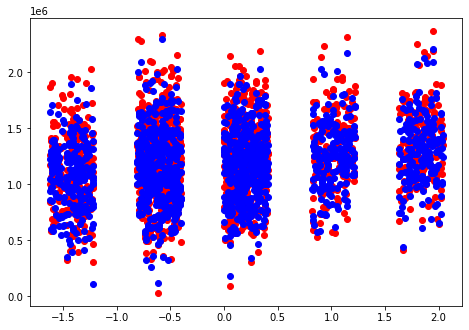

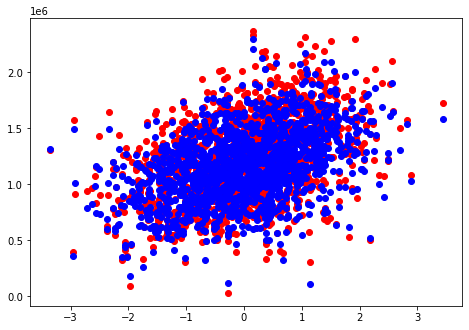

In [140]:
n = 5


for i in range(n):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(X_test[:, i], Y_test, color='r')
    ax.scatter(X_test[:, i], Y_predicted, color='b')
    plt.show()